@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/iOsR-EC9z6I

# Backpropagation Paso a Paso
# Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de carros

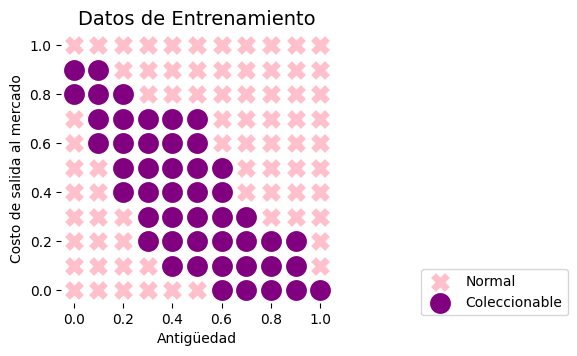

In [ ]:
# Datos de 121 carros -> [Antigüedad, costo de salida al mercado]

x = np.array([[0.0, 1.0], [0.1, 1.0], [0.2, 1.0], [0.3, 1.0], [0.4, 1.0],
              [0.5, 1.0], [0.6, 1.0], [0.7, 1.0], [0.8, 1.0], [0.9, 1.0],
              [1.0, 1.0], [0.0, 0.9], [0.1, 0.9], [0.2, 0.9], [0.3, 0.9],
              [0.4, 0.9], [0.5, 0.9], [0.6, 0.9], [0.7, 0.9], [0.8, 0.9],
              [0.9, 0.9], [1.0, 0.9], [0.0, 0.8], [0.1, 0.8], [0.2, 0.8],
              [0.3, 0.8], [0.4, 0.8], [0.5, 0.8], [0.6, 0.8], [0.7, 0.8],
              [0.8, 0.8], [0.9, 0.8], [1.0, 0.8], [0.0, 0.7], [0.1, 0.7],
              [0.2, 0.7], [0.3, 0.7], [0.4, 0.7], [0.5, 0.7], [0.6, 0.7],
              [0.7, 0.7], [0.8, 0.7], [0.9, 0.7], [1.0, 0.7], [0.0, 0.6],
              [0.1, 0.6], [0.2, 0.6], [0.3, 0.6], [0.4, 0.6], [0.5, 0.6],
              [0.6, 0.6], [0.7, 0.6], [0.8, 0.6], [0.9, 0.6], [1.0, 0.6],
              [0.0, 0.5], [0.1, 0.5], [0.2, 0.5], [0.3, 0.5], [0.4, 0.5],
              [0.5, 0.5], [0.6, 0.5], [0.7, 0.5], [0.8, 0.5], [0.9, 0.5],
              [1.0, 0.5], [0.0, 0.4], [0.1, 0.4], [0.2, 0.4], [0.3, 0.4],
              [0.4, 0.4], [0.5, 0.4], [0.6, 0.4], [0.7, 0.4], [0.8, 0.4],
              [0.9, 0.4], [1.0, 0.4], [0.0, 0.3], [0.1, 0.3], [0.2, 0.3],
              [0.3, 0.3], [0.4, 0.3], [0.5, 0.3], [0.6, 0.3], [0.7, 0.3],
              [0.8, 0.3], [0.9, 0.3], [1.0, 0.3], [0.0, 0.2], [0.1, 0.2],
              [0.2, 0.2], [0.3, 0.2], [0.4, 0.2], [0.5, 0.2], [0.6, 0.2],
              [0.7, 0.2], [0.8, 0.2], [0.9, 0.2], [1.0, 0.2], [0.0, 0.1],
              [0.1, 0.1], [0.2, 0.1], [0.3, 0.1], [0.4, 0.1], [0.5, 0.1],
              [0.6, 0.1], [0.7, 0.1], [0.8, 0.1], [0.9, 0.1], [1.0, 0.1],
              [0.0, 0.0], [0.1, 0.0], [0.2, 0.0], [0.3, 0.0], [0.4, 0.0],
              [0.5, 0.0], [0.6, 0.0], [0.7, 0.0], [0.8, 0.0], [0.9, 0.0],
              [1.0, 0.0]])

# 0 : normal    1 : coleccionable

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
              0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
              0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
              0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
              0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
              0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Gráfica de dispersión
plt.figure(figsize=(3.5, 3.5))
plt.title("Datos de Entrenamiento", fontsize=14)
plt.scatter(x[y == 0].T[0], x[y == 0].T[1],
            marker="x", s=100, color="pink", linewidths=5, label="Normal")
plt.scatter(x[y == 1].T[0], x[y == 1].T[1],
            marker="o", s=100, color="purple", linewidths=5, label="Coleccionable")
plt.xlabel("Antigüedad", fontsize=10)
plt.ylabel("Costo de salida al mercado", fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.show()

# Red Neuronal Artificial "Simplista"

In [ ]:
# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # datos de entrenamiento
    self.x = x
    # clase asociada a los datos de entrenamiento
    self.y = y
    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(4)
    self.sesgos1 = np.random.rand(2)
    self.pesos2 = np.random.rand(2)
    self.sesgos2 = np.random.rand(1)

  def entrenamiento(self, tasa_aprendizaje=0.1, epocas=1000):
    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0
      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[2] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[3] + self.sesgos1[1]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21
      print(error)

  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x, y)
red_neuronal.entrenamiento()

23.460430882879
15.94189591348626
14.729612535642605
14.581292209924882
14.551437806411782
14.542696754635514
14.538522545151524
14.535365579517377
14.532410909980435
14.529467124605224
14.52648790936074
14.523460866710204
14.520381510870585
14.51724717252726
14.514055567893974
14.510804461622138
14.507491586438945
14.504114623118223
14.500671194688238
14.497158864060768
14.49357513255322
14.489917438724161
14.486183157403085
14.48236959890468
14.47847400844597
14.474493565792452
14.470425385164244
14.46626651543513
14.462013940661064
14.457664580976855
14.453215293902854
14.44866287610591
14.444004065661803
14.439235544868513
14.434353943662465
14.429355843691274
14.42423778309895
14.418996262080055
14.413627749260307
14.408128688960947
14.402495509403124
14.396724631907082
14.390812481137191
14.38475549644027
14.378550144318258
14.372192932069396
14.365680422622415
14.359009250577518
14.35217613945477
14.34517792013519
14.338011550462555
14.330674135954728
14.323162951551096
14.31547

# Explora los resultados de la Red Neuronal entrenada

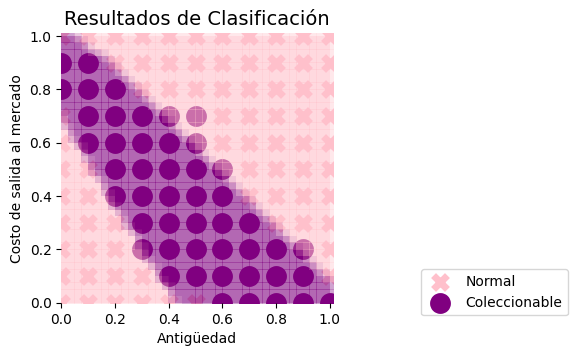

In [ ]:
plt.figure(figsize=(3.5, 3.5))
plt.title("Resultados de Clasificación", fontsize=14)

plt.scatter(x[y == 0].T[0],
            x[y == 0].T[1],
            marker="x", s=100, color="pink",
            linewidths=5, label="Normal")
plt.scatter(x[y == 1].T[0],
            x[y == 1].T[1],
            marker="o", s=100, color="purple",
            linewidths=5, label="Coleccionable")

for antiguedad in np.arange(0, 1.01, 0.025):
  for costo in np.arange(0, 1.01, 0.025):
    color = red_neuronal.clasificacion(antiguedad, costo)
    if color == 1:
      plt.scatter(antiguedad, costo, marker="s", s=110,
                  color="purple", alpha=0.2, linewidths=0)
    else:
      plt.scatter(antiguedad, costo, marker="s", s=110,
                  color="pink", alpha=0.2, linewidths=0)

plt.xlabel("Antigüedad", fontsize=10)
plt.ylabel("Costo de salida al mercado", fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()

# Referencias
* Ciaburro, G., & Venkateswaran, B. (2017). Neural Networks with R: Smart models using CNN, RNN, deep learning, and artificial intelligence principles. Packt Publishing Ltd.

* Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors. Nature, 323(6088), 533-536.

* Staudemeyer, R. C., & Morris, E. R. (2019). Understanding LSTM-a tutorial into long short-term memory recurrent neural networks. arXiv preprint arXiv:1909.09586.

* Wythoff, B. J. (1993). Backpropagation neural networks: a tutorial. Chemometrics and Intelligent Laboratory Systems, 18(2), 115-155.

